In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
df = pd.DataFrame()
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
df.head(20)

v1  ... Unnamed: 4
0    ham  ...        NaN
1    ham  ...        NaN
2   spam  ...        NaN
3    ham  ...        NaN
4    ham  ...        NaN
5   spam  ...        NaN
6    ham  ...        NaN
7    ham  ...        NaN
8   spam  ...        NaN
9   spam  ...        NaN
10   ham  ...        NaN
11  spam  ...        NaN
12  spam  ...        NaN
13   ham  ...        NaN
14   ham  ...        NaN
15  spam  ...        NaN
16   ham  ...        NaN
17   ham  ...        NaN
18   ham  ...        NaN
19  spam  ...        NaN

[20 rows x 5 columns]

In [54]:
df.shape

(5572, 5)

In [55]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [56]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)

In [59]:
df['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                                                                                         30
I cant pick the phone right now. Pls send a message                                                                                                                                                                                            12
Ok...                                                                                                                                                                                                                                          10
Ok.                                                                                                                                                                                                                                             4
Wen ur lovable bcums angry wid u

In [60]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<Figure size 1080x1080 with 0 Axes>

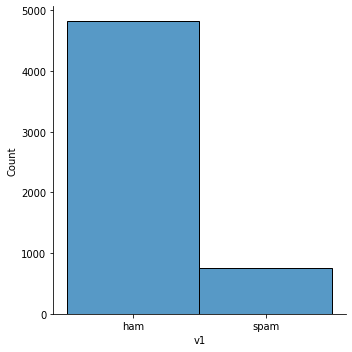

In [61]:
plt.figure(figsize=(15,15))
sns.displot(df['v1'])
plt.show()

In [62]:
encode = {"spam": 1, "ham": 0}
df['v1']=df['v1'].map(encode)
df.head()

v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro...

In [63]:
###

##Natural Language Processing

In [64]:
import nltk
nltk.download('punkt') # Used for sentence tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

lines = df['v2'].values.tolist()

In [66]:
lines

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

In [67]:
# a function to remove stop words,punctuation, alpha_numeric

def remove_not_essential(Sentence):
  tokens = word_tokenize(Sentence)
  # convert to lower case
  tokens = [w.lower() for w in tokens]

  # remove punctuation from each word    
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]

  # remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()] #.isalpha returns True if the chaarcters are aphabets

  # filter out stop words    
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  return words

In [68]:
filtered_message = list()
for line in lines:   
    w=remove_not_essential(line)
    filtered_message.append(w)

In [69]:
len(filtered_message)

5572

In [70]:
filtered_message[:5]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'apply'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'nt', 'think', 'goes', 'usf', 'lives', 'around', 'though']]

In [71]:
#count the max length of a messane
def len_count(all_sentence):
  max_l=0
  for i in all_sentence:
    l=len(i)
    if l>max_l:
      max_l=l
  return max_l

In [72]:
len_count(filtered_message)

80

## Creating a Word Embading Matrix

In [73]:
import gensim # Process plain text 

EMBEDDING_DIM = 100
# train word2vec model
model = gensim.models.Word2Vec(sentences=filtered_message, size=EMBEDDING_DIM, window=5, min_count=1)
'''
size : Number of dimensions of the embeddings
window : sliding window size
min_count : Minimum count of words to consider while training a model. Default is 5
'''
# vocab size
words = list(model.wv.vocab) # wv is the object that contain mappings between words and embeddings
print('Vocabulary size: %d' % len(words))

Vocabulary size: 7782


In [74]:
words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'may',
 'text',
 'receive',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 'dun',
 'say',
 'early',
 'hor',
 'already',
 'nah',
 'nt',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'xxx',
 'chgs',
 'send',
 'rcv',
 'even',
 'brother',
 'speak',
 'treat',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 'copy',
 'friends',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'code',
 'valid',
 'hours',
 'mobile',
 'months',
 'r',
 'entitled',
 'upd

In [75]:
print(model['id'])
      
len(model['id'])

[ 0.04881845 -0.02576691 -0.04265022  0.08907954  0.09592485 -0.04610934
 -0.0380627  -0.05989242 -0.02416541  0.07629247  0.02158893 -0.07272408
 -0.00429172  0.06037234  0.01558871 -0.08476947 -0.00484594  0.12272055
  0.02866434  0.01839078 -0.05878052  0.00669892  0.1259816  -0.03443901
  0.00704847 -0.01330614  0.09984367  0.00924344 -0.09255297  0.04748258
  0.02972473 -0.10596737  0.01461572 -0.04744032 -0.00411489  0.00546118
 -0.08351712 -0.14286208 -0.01862465 -0.02821631 -0.00035456  0.13767694
  0.07639883  0.05380658 -0.04857388  0.0136321  -0.07206936  0.00532886
 -0.04237637 -0.00231456 -0.05460224  0.09772059 -0.0370661   0.03040194
  0.08373025  0.05201684 -0.00843695  0.14239697 -0.06683892 -0.06198893
 -0.06982169  0.01312406  0.07181937 -0.02567246 -0.0560283  -0.09473037
 -0.03015892  0.0158635   0.0555095  -0.03386762  0.05155554  0.01911129
 -0.01472718  0.00998293 -0.09567928 -0.03085197 -0.07307912  0.07020432
 -0.09708527 -0.08299027 -0.03676218  0.00821747 -0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


100

In [76]:
# save model in ASCII (word2vec) format
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False) # Don't want to store it in binary format. Default : binary format to save space

## Load the embedding vector

In [77]:
import os

embeddings_index = {}
#f = open(os.path.join('', 'embedding_word2vec.txt'),  encoding = "utf-8")
f = open('/content/embedding_word2vec.txt')
for line in f:
  print(line)
  values = line.split()
  #print(values)
  word = values[0]
  coefs = np.asarray(values[1:])
  embeddings_index[word] = coefs
f.close()


7782 100

u 0.44126806 -0.22805516 -0.3538226 0.7642118 0.8089381 -0.42347 -0.34026802 -0.4821327 -0.18888955 0.6407139 0.22330682 -0.61234474 -0.01351367 0.48310322 0.15934622 -0.7537476 -0.015057197 1.0213045 0.25423977 0.18146017 -0.52379787 0.07247885 1.1103147 -0.30216128 0.020139985 -0.13108987 0.8715069 0.06861944 -0.80196756 0.41649917 0.26916543 -0.8786765 0.13894072 -0.40357763 -0.056132127 0.061738223 -0.7180565 -1.2440889 -0.19460174 -0.23580655 -0.021117814 1.1984543 0.61910003 0.42485458 -0.43210444 0.100555904 -0.6057915 0.027208751 -0.38005337 -0.044511925 -0.44292134 0.8296721 -0.35191733 0.27306154 0.7077403 0.42073774 -0.10802715 1.2486941 -0.603855 -0.49511516 -0.5720425 0.079222314 0.5774352 -0.24828134 -0.46457684 -0.85256505 -0.2273665 0.16133396 0.502039 -0.2988932 0.40428823 0.13348348 -0.15365373 0.04428492 -0.8051593 -0.30012563 -0.6450987 0.57604414 -0.8316039 -0.71944493 -0.3362034 0.11599734 -0.15337998 0.08761467 -0.32883227 0.36690894 -0.5297122 -0.51214

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




avin -0.000992062 -0.0013170752 -0.0011803267 -0.0022849503 0.0012827349 0.0005102174 -0.0018301714 -0.0043702694 -0.002368529 -0.00012257599 0.0040669776 0.0006739507 -0.0015779819 0.0029315443 0.0048062764 -0.0012834127 0.0012151687 0.0016714908 0.00083441124 0.0017230826 -0.0022323458 -0.0009848523 -0.0010705912 0.004170964 0.0043330193 0.0001973617 0.0022754588 0.0022586663 0.00068227004 -0.002210601 0.002812059 -0.002464661 0.0050183893 -0.005438001 -0.004439886 0.0047243657 -0.0052155717 -0.0033464842 0.0026150786 -0.0037244144 0.00085164706 0.0014526366 -0.0012957349 0.0027388157 -0.003835462 0.0048334035 0.0016865637 -0.0003629745 -0.0022297315 -0.0050127655 -0.0039087674 0.004259699 0.00048545195 0.0010343057 0.0047446187 0.0017696515 0.0034256806 0.007178252 0.001201305 -0.0055634473 -0.0050703357 -0.0032757442 -0.0019872338 -0.0007156609 -0.0019406384 -0.005937955 0.0032229288 -0.004808456 0.005054056 0.00033866073 -0.0012429802 0.0012901786 -0.0031347321 -0.001161128 0.001

In [78]:
embeddings_index

{'7782': array(['100'], dtype='<U3'),
 'u': array(['0.44126806', '-0.22805516', '-0.3538226', '0.7642118',
        '0.8089381', '-0.42347', '-0.34026802', '-0.4821327',
        '-0.18888955', '0.6407139', '0.22330682', '-0.61234474',
        '-0.01351367', '0.48310322', '0.15934622', '-0.7537476',
        '-0.015057197', '1.0213045', '0.25423977', '0.18146017',
        '-0.52379787', '0.07247885', '1.1103147', '-0.30216128',
        '0.020139985', '-0.13108987', '0.8715069', '0.06861944',
        '-0.80196756', '0.41649917', '0.26916543', '-0.8786765',
        '0.13894072', '-0.40357763', '-0.056132127', '0.061738223',
        '-0.7180565', '-1.2440889', '-0.19460174', '-0.23580655',
        '-0.021117814', '1.1984543', '0.61910003', '0.42485458',
        '-0.43210444', '0.100555904', '-0.6057915', '0.027208751',
        '-0.38005337', '-0.044511925', '-0.44292134', '0.8296721',
        '-0.35191733', '0.27306154', '0.7077403', '0.42073774',
        '-0.10802715', '1.2486941', '-0.6038

# Create a lstm Model

In [116]:
max_length = 80

In [117]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

VALIDATION_SPLIT = 0.3

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(filtered_message)


# Transforms text into a sequence of integers
sequences = tokenizer_obj.texts_to_sequences(filtered_message)


In [118]:
sequences[:5]

[[9,
  3668,
  649,
  574,
  544,
  1070,
  35,
  57,
  214,
  1071,
  83,
  2491,
  1072,
  12,
  3669,
  63],
 [8, 215, 1213, 326, 1, 1602],
 [10,
  337,
  612,
  742,
  101,
  1603,
  965,
  489,
  1604,
  165,
  21,
  1603,
  216,
  337,
  423,
  743,
  24,
  368,
  58,
  277],
 [1, 144, 73, 252, 2492, 1, 58, 74, 73],
 [794, 5, 44, 338, 744, 1605, 124, 339]]

In [119]:

word_index = tokenizer_obj.word_index # Maps words to their numeric representation
print('Found %s unique tokens.' % len(word_index))

feature_sequence_after_pading = pad_sequences(sequences, maxlen=max_length)
target_feature =  df['v1'].values

print('Shape of inpur tensor:', feature_sequence_after_pading.shape)
print('Shape of output tensor:', target_feature.shape)



Found 7782 unique tokens.
Shape of inpur tensor: (5572, 80)
Shape of output tensor: (5572,)


In [120]:
sequence_after_pading.shape[0]

5572

In [121]:
# split the data into a training set and a validation set
indices = np.arange(feature_sequence_after_pading.shape[0])
print(indices)
#print(len(indices))

# indices is the suffel of 5572 no. randomly
np.random.shuffle(indices)
print(indices)
#print(len(indices))


[   0    1    2 ... 5569 5570 5571]
[4941 3097 3224 ... 1269  441 5059]


In [122]:
X= feature_sequence_after_pading[indices]
Y= target_feature[indices]
num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0])

In [123]:
X_train = X[:-num_validation_samples]
y_train = Y[:-num_validation_samples]
X_test = X[-num_validation_samples:]
y_test = Y[-num_validation_samples:]

In [124]:
print('Shape of X_train tensor:', X_train.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_testd tensor:', X_test.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train tensor: (3901, 80)
Shape of y_train tensor: (3901,)
Shape of X_testd tensor: (1671, 80)
Shape of y_test tensor: (1671,)


In [125]:
# "word_index" is embedding matrix
for word, i in word_index.items():
  print(word,i)
 

Streaming output truncated to the last 5000 lines.
given 2783
ultimatum 2784
countin 2785
aburo 2786
inconsiderate 2787
nag 2788
recession 2789
hence 2790
soo 2791
warning 2792
nowi 2793
shoes 2794
worlds 2795
discreet 2796
named 2797
genius 2798
connections 2799
lotta 2800
lately 2801
virgin 2802
mystery 2803
wwwsmsconet 2804
approx 2805
consider 2806
peaceful 2807
fixedline 2808
castor 2809
downloaded 2810
ear 2811
oil 2812
mac 2813
usb 2814
gibbs 2815
unbelievable 2816
ie 2817
superb 2818
several 2819
worst 2820
charles 2821
stores 2822
peak 2823
sweets 2824
chip 2825
yck 2826
ashley 2827
jeans 2828
bleh 2829
tons 2830
scores 2831
application 2832
filthy 2833
simpler 2834
necklace 2835
racing 2836
rice 2837
closes 2838
crap 2839
borin 2840
chocolate 2841
dayshe 2842
reckon 2843
tech 2844
blessed 2845
quiet 2846
aunts 2847
helen 2848
fan 2849
lovers 2850
anniversary 2851
secretly 2852
pattern 2853
plm 2854
sheffield 2855
zoe 2856
setting 2857
filling 2858
sufficient 2859
thx 2860
edi

In [126]:
# Vector represent of allwords from  "word_index" Embedding vector

EMBEDDING_DIM =100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [127]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,Dropout, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

# define model
model = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model.add(embedding_layer)
model.add(LSTM(units=64,  dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 80, 100)           778300    
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                42240     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)        

In [128]:
print('Train...')

model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test), verbose=2)

Train...
Epoch 1/50
31/31 - 12s - loss: 0.4347 - accuracy: 0.8447 - val_loss: 0.3241 - val_accuracy: 0.8683
Epoch 2/50
31/31 - 6s - loss: 0.3401 - accuracy: 0.8618 - val_loss: 0.3226 - val_accuracy: 0.8683
Epoch 3/50
31/31 - 6s - loss: 0.3315 - accuracy: 0.8649 - val_loss: 0.3312 - val_accuracy: 0.8683
Epoch 4/50
31/31 - 6s - loss: 0.3264 - accuracy: 0.8649 - val_loss: 0.3173 - val_accuracy: 0.8683
Epoch 5/50
31/31 - 6s - loss: 0.3236 - accuracy: 0.8649 - val_loss: 0.3273 - val_accuracy: 0.8683
Epoch 6/50
31/31 - 6s - loss: 0.3220 - accuracy: 0.8649 - val_loss: 0.3101 - val_accuracy: 0.8683
Epoch 7/50
31/31 - 6s - loss: 0.3153 - accuracy: 0.8647 - val_loss: 0.3055 - val_accuracy: 0.8683
Epoch 8/50
31/31 - 6s - loss: 0.3093 - accuracy: 0.8652 - val_loss: 0.3678 - val_accuracy: 0.8683
Epoch 9/50
31/31 - 6s - loss: 0.3160 - accuracy: 0.8647 - val_loss: 0.2992 - val_accuracy: 0.8683
Epoch 10/50
31/31 - 6s - loss: 0.3094 - accuracy: 0.8649 - val_loss: 0.3248 - val_accuracy: 0.8683
Epoch 11/

In [129]:
print('Testing...')
score, acc = model.evaluate(X_test, y_test, batch_size=128)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy: {0:.2%}".format(acc))

Testing...
14/14 [==============================] - 0s 29ms/step - loss: 0.2669 - accuracy: 0.8809
Test score: 0.26693230867385864
Test accuracy: 0.8809096217155457
Accuracy: 88.09%


In [130]:
model.save_weights('Spam_detection.h5')

In [131]:
with open('model_architecture_Spam_detection.json','w') as f:
    f.write(model.to_json())

In [132]:
from keras.models import load_model
from keras.models import model_from_json

In [133]:
# Model reconstruction from JSON file
with open('/content/model_architecture_Spam_detection.json', 'r') as f:
    model = model_from_json(f.read())

In [134]:
model.load_weights('/content/Spam_detection.h5')

## test on seen test data 

In [139]:
#let us check how the model predicts
classes = model.predict(X_test[:10], batch_size=128)
for i in range (10):
    if(classes[i] > 0.5 and y_test[i] == 1 or (classes[i] <= 0.5 and y_test[i] == 0)):
        print( classes[i], y_test[i], " Right prdiction")
    else :
        print( classes[i], y_test[i], " Wrong prdiction")

[0.01018432] 0  Right prdiction
[0.00748077] 0  Right prdiction
[0.19342065] 0  Right prdiction
[0.05684856] 0  Right prdiction
[0.00752839] 0  Right prdiction
[0.0151929] 0  Right prdiction
[0.38937765] 1  Wrong prdiction
[0.20735165] 0  Right prdiction
[0.04396576] 0  Right prdiction
[0.2371139] 0  Right prdiction


## test on unseen test data 

In [150]:
#Let us test some  samples
test_sample_1 = "Sorry, I'll call later "
test_sample_2 = "I cant pick the phone right now. Pls send a message"
test_sample_3 = "Maybe someone is calling you ."
test_sample_4 = "Ok...have a good day"
test_sample_5 = "Dear Voucher Holder, To claim this weeks offer, at you PC please go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply. To stop texts, txt STOP to 80062t"
test_sample_6 = "Wen ur lovable bcums angry wid u, dnt take it seriously.. Have nice day da."
test_sample_7 = "hellow,My exam is for february 4. Wish you a great day."
test_sample_8 = "TaKe CaRE and gET WeLL sOOn"
test_samples = [test_sample_1, test_sample_2, test_sample_3, test_sample_4, test_sample_5, test_sample_6, test_sample_7, test_sample_8]

test_samples_tokens = tokenizer_obj.texts_to_sequences(test_samples)
test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=max_length)

#predict
pred=model.predict(x=test_samples_tokens_pad)
pred=pred.tolist()
from itertools import chain
pred = list(chain.from_iterable(pred))
print(pred)
for i in range(8):
  if pred[i]<0.5:
    print("[", test_samples[i], "]---> is  not spam")
  else:
    print("[", test_samples[i], "] --->is spam")


[0.008545368909835815, 0.02547401189804077, 0.004018247127532959, 0.012403219938278198, 0.26420003175735474, 0.3559339642524719, 0.023375362157821655, 0.010876774787902832]
[ Sorry, I'll call later  ]---> is  not spam
[ I cant pick the phone right now. Pls send a message ]---> is  not spam
[ Maybe someone is calling you . ]---> is  not spam
[ Ok...have a good day ]---> is  not spam
[ Dear Voucher Holder, To claim this weeks offer, at you PC please go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply. To stop texts, txt STOP to 80062t ]---> is  not spam
[ Wen ur lovable bcums angry wid u, dnt take it seriously.. Have nice day da. ]---> is  not spam
[ hellow,My exam is for february 4. Wish you a great day. ]---> is  not spam
[ TaKe CaRE and gET WeLL sOOn ]---> is  not spam
